# Project 3: Wake County Housing Data Set

## Getting and Exploring the Data

In [1]:
import pandas as pd
housing = pd.read_csv("WakeCountyHousing.csv")
housing.head(5)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
Real_Estate_Id        308292 non-null int64
Deeded_Acreage        308292 non-null float64
Total_Sale_Price      308292 non-null int64
Total_Sale_Date       308292 non-null object
Month_Year_of_Sale    308292 non-null object
Year_of_Sale          308292 non-null int64
Year_Built            308292 non-null int64
Year_Remodeled        308292 non-null int64
Heated_Area           308292 non-null int64
Num_Stories           308292 non-null object
Design_Style          308292 non-null object
Bath                  308275 non-null object
Utilities             306324 non-null object
Physical_City         308183 non-null object
Physical_Zip          308146 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 35.3+ MB


It looks like there are 308,292 entries. However, there are some null entries for Bath, Utilities, Physical_City, and Physical_Zip with these 4 factors having less than 308,292 non-null entries

In [3]:
max(housing['Total_Sale_Date'])

'9/9/2020'

In [4]:
min(housing['Total_Sale_Date'])

'1/1/1956'

It looks like the data set is looking at the sales of houses from 1956 to 2020

Let's take a look at the unique values of Num_Stories, Design_Style, Bath, Utilities, and Physical_City

In [6]:
housing['Num_Stories'].unique()

array(['One Story', 'Two Story', 'Other'], dtype=object)

In [11]:
housing['Num_Stories'].value_counts()

Other        186691
One Story     98744
Two Story     22857
Name: Num_Stories, dtype: int64

In [7]:
housing['Design_Style'].unique()

array(['Split level', 'Conventional', 'Ranch', 'Townhouse', 'Split Foyer',
       'Contemporary', 'Modular', 'Colonial', 'Conversion', 'Condo',
       'Log', 'Duplex', 'Manuf Multi', 'Cape'], dtype=object)

In [8]:
housing['Bath'].unique()

array(['2 Bath', '1 Bath', 'Other', '3 Bath', '3½ Bath', '1 ½ Bath',
       '2½ Bath', nan], dtype=object)

In [12]:
housing['Bath'].value_counts()

2½ Bath     129385
2 Bath       57817
3½ Bath      54286
3 Bath       29079
Other        14398
1 Bath       12376
1 ½ Bath     10934
Name: Bath, dtype: int64

In [9]:
housing['Utilities'].unique()

array(['ALL', 'E', 'WSE', 'WGE', 'WE', nan, 'GE', 'S', 'WSG', 'W', 'SGE',
       'G', 'SE', 'SG', 'WG', 'WS'], dtype=object)

In [10]:
housing['Physical_City'].unique()

array(['Raleigh', 'Wendell', 'Cary', 'Knightdale', 'Fuquay Varina',
       'Garner', 'Apex', 'Wake Forest', 'Holly Springs', 'Zebulon',
       'Willow Spring', 'Rolesville', 'New Hill', 'Clayton', 'Durham',
       'Morrisville', 'Youngsville', 'Creedmoor', nan, 'Angier'],
      dtype=object)

Some takeaways from these: 
* All of these categorical variables have a reasonable amount of different categories within them that we could deal with for One Hot Encoding
* Num_Stories contains an other attribute that contains the majority of the entries. I am going to assume that this just means that it has 3 or more stories, but will need to look further into this
* I will need to look into what the different Design_Style categories mean
* Bath has a similar category as Num_Stories with Other
* I will need to look into what the different Utilities acronyms for categories mean

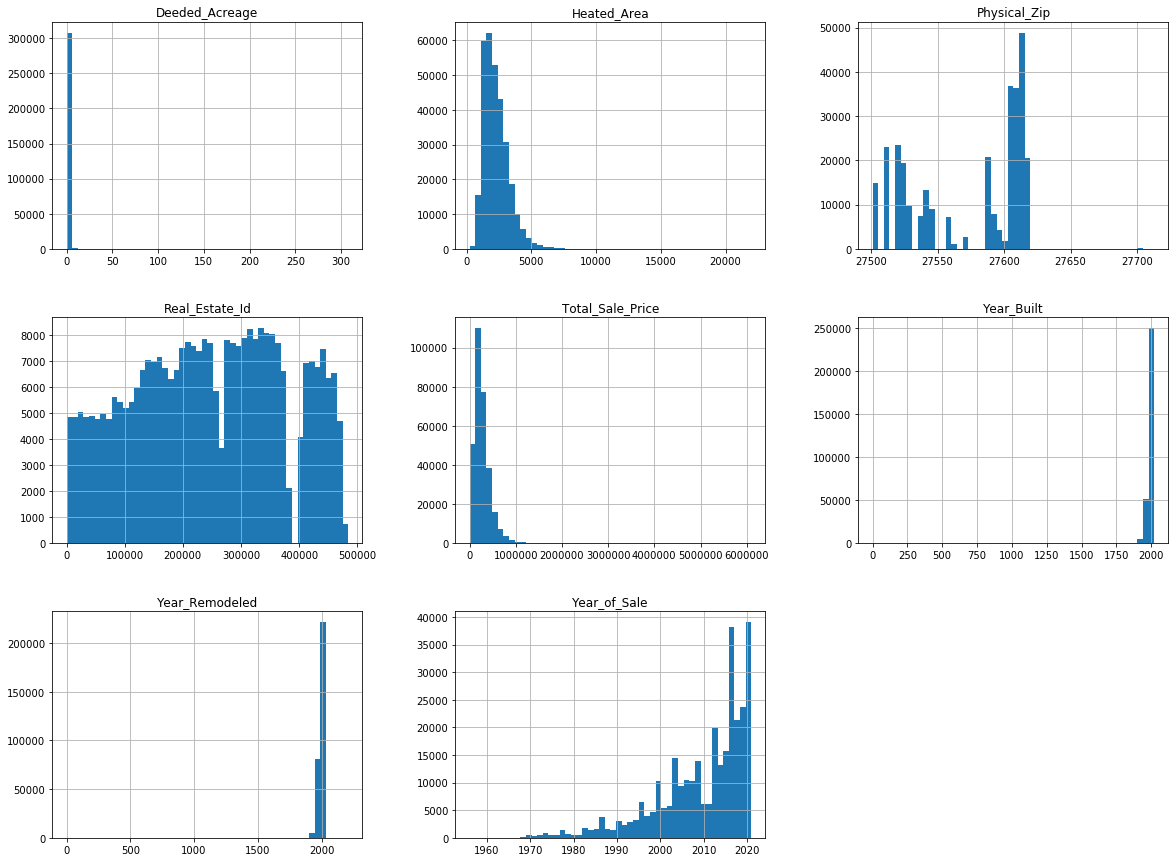

In [15]:
import matplotlib.pyplot as plt
plt = housing.hist(bins=50, figsize=(20,15))

# Data Prep

Source: https://www.wakegov.com/departments-government/tax-administration/data-files-statistics-and-reports/real-estate-property-data-files

Utilities categories:
* A: All
* E: Electric
* G: Gas
* W: Water
* S: Sewer